<a href="https://colab.research.google.com/github/CuriousAnmol/Smart-Load-Management-System-/blob/main/Smart_Load_Management_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("/content/electricity_load_data (1).csv")  # Replace with the uploaded file name


In [4]:
# Convert Timestamp column to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Hour"] = df["Timestamp"].dt.hour

# Check for missing values
print(df.isnull().sum())

# Drop missing values if necessary
df.dropna(inplace=True)

# Display the first few rows
df.head()


Timestamp               0
Appliance               0
Room                    0
Total Energy (kWh)      0
Source                  0
Battery Level (%)       0
Inverter Output (kW)    0
Hour                    0
dtype: int64


,Timestamp,Appliance,Room,Total Energy (kWh),Source,Battery Level (%),Inverter Output (kW),Hour
0,2024-02-01 00:00:00,Refrigerator,Garage,3.868131,Grid,30.720490,0.923963,0
1,2024-02-01 01:00:00,Refrigerator,Kitchen,2.832770,Solar,55.275992,0.924785,1
2,2024-02-01 02:00:00,Refrigerator,Office,4.463825,Grid,33.554929,2.621174,2
3,2024-02-01 03:00:00,Refrigerator,Kitchen,4.542129,Grid,24.697099,0.939370,3
4,2024-02-01 04:00:00,Refrigerator,Kitchen,3.151549,Grid,71.557329,2.550736,4


<ipython-input-6-4bf2ee1dd156>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Appliance"], y=df["Total Energy (kWh)"], ci=None)


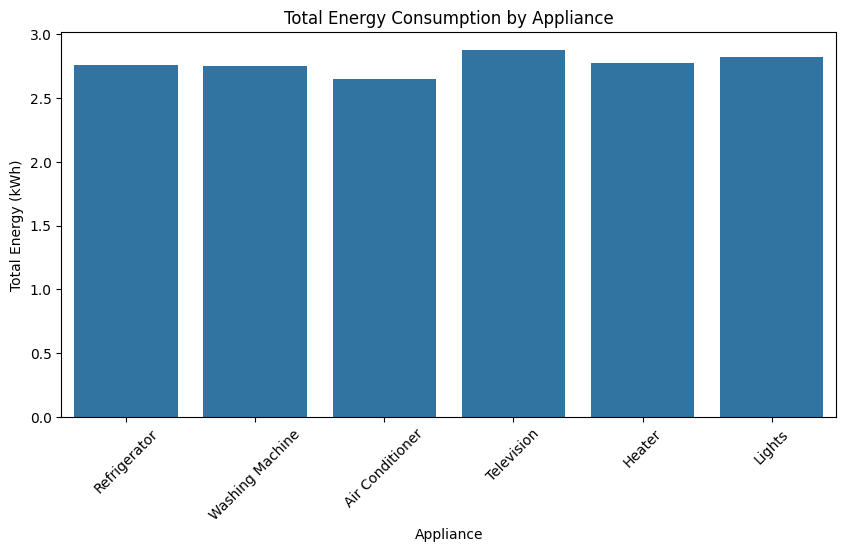

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Appliance"], y=df["Total Energy (kWh)"], ci=None)
plt.xticks(rotation=45)
plt.title("Total Energy Consumption by Appliance")
plt.show()


<ipython-input-7-4466e6fa4e7b>:1: FutureWarning: The provided callable <function sum at 0x797e4bfc1080> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_pivot = df.pivot_table(values='Total Energy (kWh)', index='Hour', columns='Room', aggfunc=np.sum)


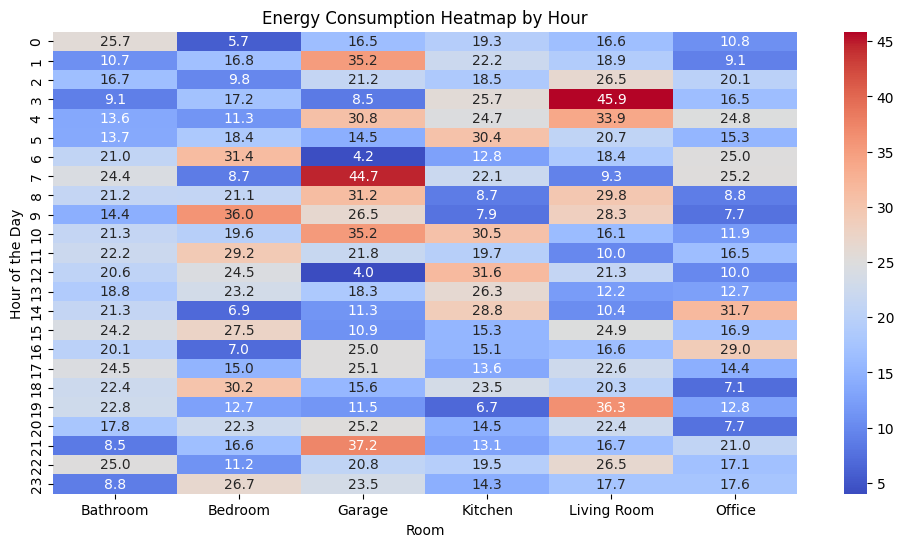

In [7]:
df_pivot = df.pivot_table(values='Total Energy (kWh)', index='Hour', columns='Room', aggfunc=np.sum)

plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Energy Consumption Heatmap by Hour")
plt.xlabel("Room")
plt.ylabel("Hour of the Day")
plt.show()


<ipython-input-8-3adddfbca588>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Source"], y=df["Total Energy (kWh)"], ci=None)


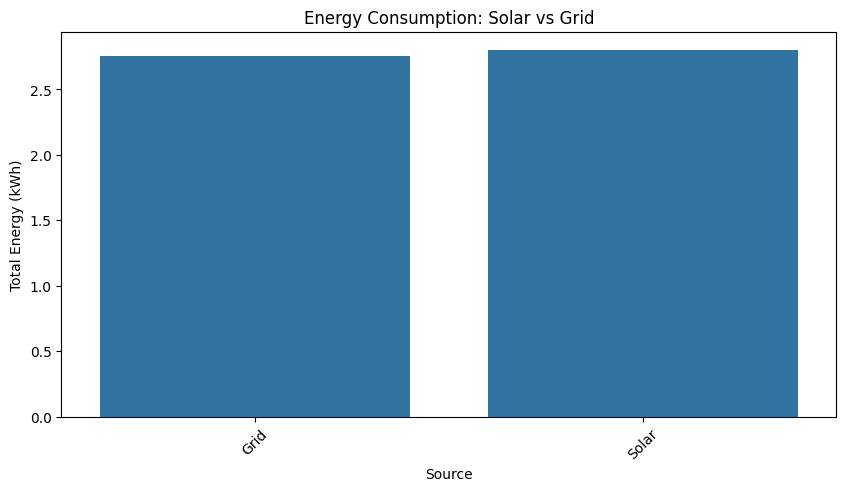

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Source"], y=df["Total Energy (kWh)"], ci=None)
plt.xticks(rotation=45)
plt.title("Energy Consumption: Solar vs Grid")
plt.show()


<ipython-input-11-6d822700bb74>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='2024-01-01', periods=50, freq='H')


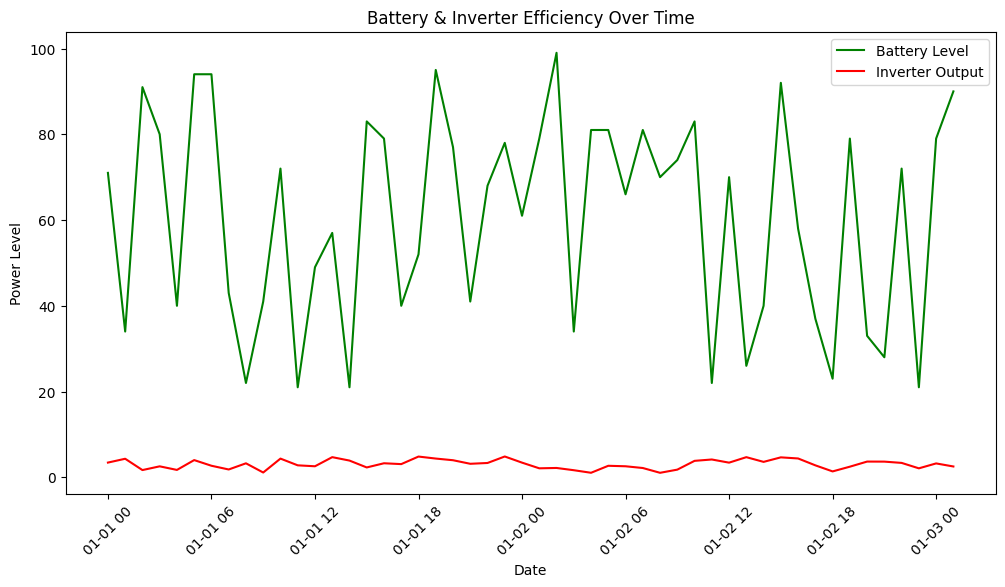

In [11]:
np.random.seed(42)
date_rng = pd.date_range(start='2024-01-01', periods=50, freq='H')
df = pd.DataFrame({
    "Timestamp": date_rng,
    "Battery Level (%)": np.random.randint(20, 100, size=len(date_rng)),
    "Inverter Output (kW)": np.random.uniform(1, 5, size=len(date_rng))
})

# Convert Timestamp to Datetime Format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df["Timestamp"], df["Battery Level (%)"], color='green', label='Battery Level')
plt.plot(df["Timestamp"], df["Inverter Output (kW)"], color='red', label='Inverter Output')

# Labels and Title
plt.xlabel("Date")
plt.ylabel("Power Level")
plt.title("Battery & Inverter Efficiency Over Time")
plt.legend()
plt.xticks(rotation=45)

# Show the plot
plt.show()

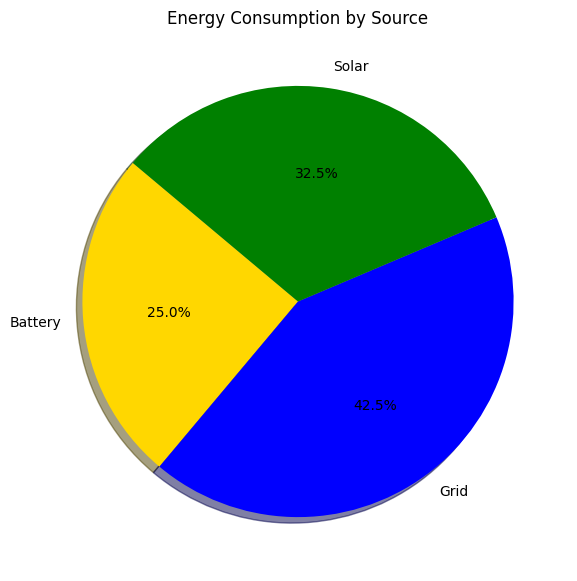

In [13]:
df = pd.DataFrame({
    "Source": ["Solar", "Grid", "Battery", "Solar", "Grid", "Battery"],
    "Energy Used (kWh)": [120, 180, 90, 140, 160, 110]
})

# Aggregate energy consumption by source
energy_by_source = df.groupby("Source")["Energy Used (kWh)"].sum()

# Plotting Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(energy_by_source, labels=energy_by_source.index, autopct='%1.1f%%',
        colors=["gold", "blue", "green"], startangle=140, shadow=True)

# Title
plt.title("Energy Consumption by Source")

# Show the pie chart
plt.show()

<ipython-input-14-f636d274b618>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=energy_by_appliance.index, y=energy_by_appliance.values, ax=axes[0, 1], palette="coolwarm")


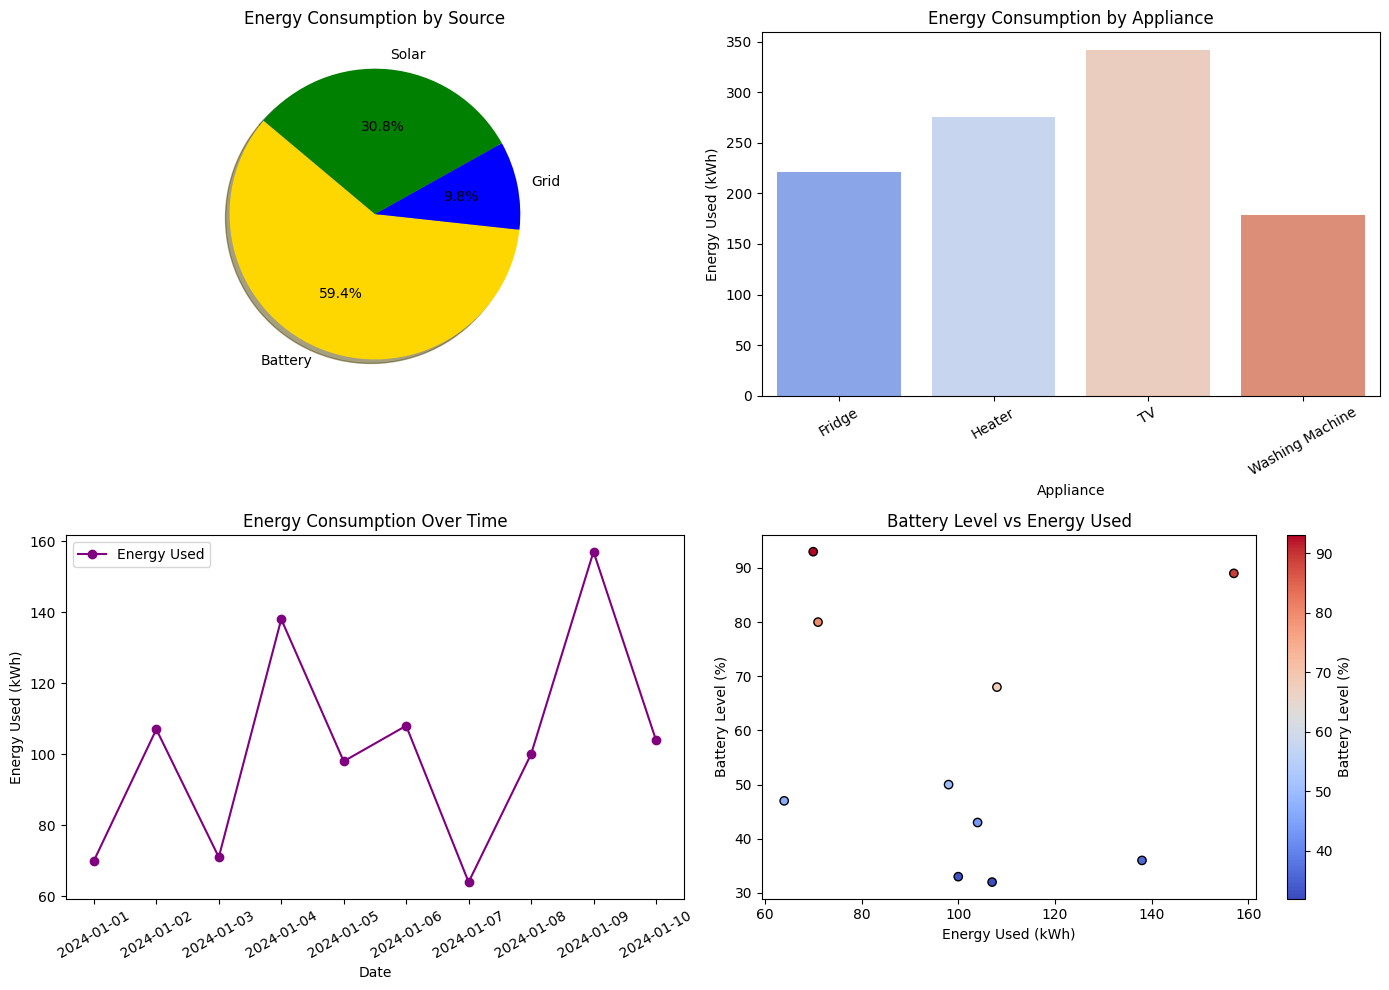

In [14]:
np.random.seed(42)
df = pd.DataFrame({
    "Timestamp": pd.date_range(start="2024-01-01", periods=10, freq="D"),
    "Source": np.random.choice(["Solar", "Grid", "Battery"], 10),
    "Appliance": np.random.choice(["AC", "Fridge", "Heater", "TV", "Washing Machine"], 10),
    "Energy Used (kWh)": np.random.randint(50, 200, 10),
    "Battery Level (%)": np.random.randint(30, 100, 10)
})

# Aggregate data
energy_by_source = df.groupby("Source")["Energy Used (kWh)"].sum()
energy_by_appliance = df.groupby("Appliance")["Energy Used (kWh)"].sum()

# Create Subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# **1. Pie Chart - Energy Consumption by Source (1st Dimension)**
axes[0, 0].pie(energy_by_source, labels=energy_by_source.index, autopct='%1.1f%%',
               colors=["gold", "blue", "green"], startangle=140, shadow=True)
axes[0, 0].set_title("Energy Consumption by Source")

# **2. Bar Chart - Appliance-wise Energy Usage (2nd Dimension)**
sns.barplot(x=energy_by_appliance.index, y=energy_by_appliance.values, ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title("Energy Consumption by Appliance")
axes[0, 1].set_xlabel("Appliance")
axes[0, 1].set_ylabel("Energy Used (kWh)")
axes[0, 1].tick_params(axis='x', rotation=30)

# **3. Line Chart - Energy Consumption Over Time (3rd Dimension)**
axes[1, 0].plot(df["Timestamp"], df["Energy Used (kWh)"], marker='o', color='purple', label='Energy Used')
axes[1, 0].set_title("Energy Consumption Over Time")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Energy Used (kWh)")
axes[1, 0].tick_params(axis='x', rotation=30)
axes[1, 0].legend()

# **4. Scatter Plot - Battery Level vs Energy Used (4th Dimension)**
scatter = axes[1, 1].scatter(df["Energy Used (kWh)"], df["Battery Level (%)"],
                             c=df["Battery Level (%)"], cmap="coolwarm", edgecolors="black")
axes[1, 1].set_title("Battery Level vs Energy Used")
axes[1, 1].set_xlabel("Energy Used (kWh)")
axes[1, 1].set_ylabel("Battery Level (%)")
fig.colorbar(scatter, ax=axes[1, 1], label="Battery Level (%)")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

<ipython-input-15-106fadeffe47>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Gadget"], y=df["Energy Used (kWh)"], ax=axes[0, 1], palette="coolwarm")


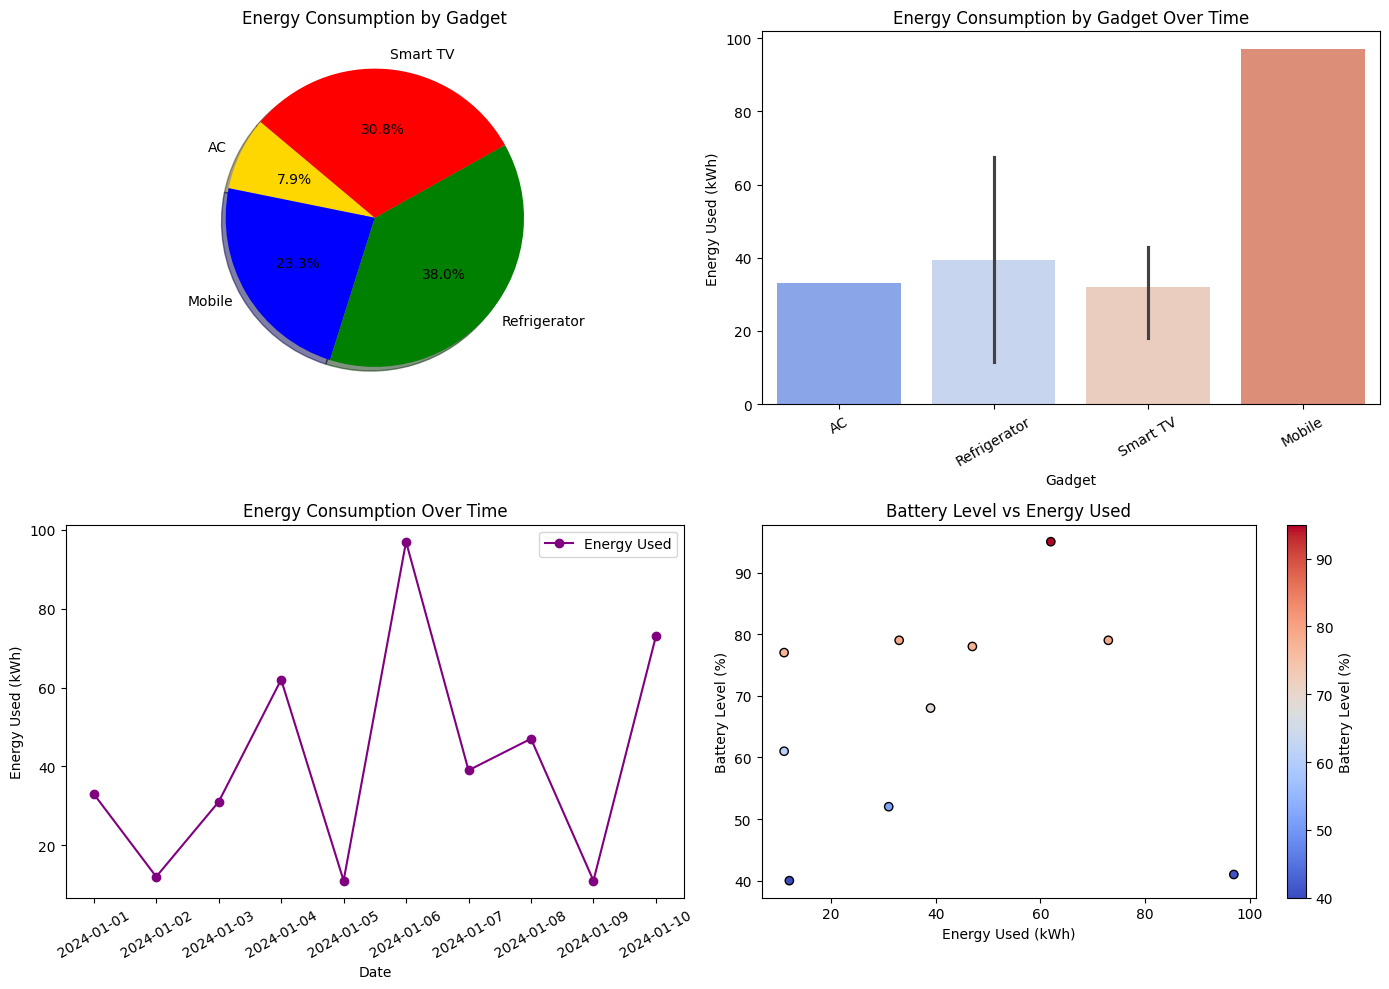

In [15]:
np.random.seed(42)
df = pd.DataFrame({
    "Timestamp": pd.date_range(start="2024-01-01", periods=10, freq="D"),
    "Gadget": np.random.choice(["Laptop", "Mobile", "Smart TV", "AC", "Refrigerator"], 10),
    "Energy Used (kWh)": np.random.randint(10, 100, 10),
    "Battery Level (%)": np.random.randint(20, 100, 10)
})

# Aggregate data
energy_by_gadget = df.groupby("Gadget")["Energy Used (kWh)"].sum()

# Create Subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# **1. Pie Chart - Energy Consumption by Gadget**
axes[0, 0].pie(energy_by_gadget, labels=energy_by_gadget.index, autopct='%1.1f%%',
               colors=["gold", "blue", "green", "red", "purple"], startangle=140, shadow=True)
axes[0, 0].set_title("Energy Consumption by Gadget")

# **2. Bar Chart - Gadget Energy Usage Over Time**
sns.barplot(x=df["Gadget"], y=df["Energy Used (kWh)"], ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title("Energy Consumption by Gadget Over Time")
axes[0, 1].set_xlabel("Gadget")
axes[0, 1].set_ylabel("Energy Used (kWh)")
axes[0, 1].tick_params(axis='x', rotation=30)

# **3. Line Chart - Energy Usage Trends**
axes[1, 0].plot(df["Timestamp"], df["Energy Used (kWh)"], marker='o', color='purple', label='Energy Used')
axes[1, 0].set_title("Energy Consumption Over Time")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Energy Used (kWh)")
axes[1, 0].tick_params(axis='x', rotation=30)
axes[1, 0].legend()

# **4. Scatter Plot - Energy Usage vs Battery Level**
scatter = axes[1, 1].scatter(df["Energy Used (kWh)"], df["Battery Level (%)"],
                             c=df["Battery Level (%)"], cmap="coolwarm", edgecolors="black")
axes[1, 1].set_title("Battery Level vs Energy Used")
axes[1, 1].set_xlabel("Energy Used (kWh)")
axes[1, 1].set_ylabel("Battery Level (%)")
fig.colorbar(scatter, ax=axes[1, 1], label="Battery Level (%)")

# Adjust layout and show plots
plt.tight_layout()
plt.show()